In [1]:
#Libraries needed in order to run the program for machine learning

import numpy as np #Used for working with arrays
import pandas as pd #Used for analysing data 
import matplotlib.pyplot as plt #Creating figures and plotting
import seaborn as sns #Data Visualisation, used for displaying  statistical graphs

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler #Used for Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV #Used for Training & Testing and Tuning
from sklearn.linear_model import LogisticRegression #Used for Logistic Regression
from sklearn.neighbors import KNeighborsClassifier #Used for KNN (K-Nearest Neighbours)
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #Part of evaluation
from sklearn_evaluation import plot #Evaluation with Graphs

#Reference: https://www.datacamp.com/cheat-sheet/scikit-learn-cheat-sheet-python-machine-learning

%matplotlib inline



In [2]:
#Dataset added to the code in order to run the Machine Learning models

df = pd.read_csv('churn.csv', low_memory = False)
df.head()



,Unnamed: 0,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
4,4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1


In [3]:
#Checking the columns and their statistics

df.info()
df.isnull().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               31564 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36704 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

Unnamed: 0                         0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [4]:
#Dropping columns with unique values and rows with missing values

df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('security_no', axis=1, inplace=True)
df.drop('referral_id', axis=1, inplace=True)
df.drop('last_visit_time', axis=1, inplace=True)
df.dropna(axis = 0, how = 'any')
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)



In [5]:
#Checking the columns and their statistics

df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28373 entries, 0 to 28372
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           28373 non-null  int64  
 1   gender                        28373 non-null  object 
 2   region_category               28373 non-null  object 
 3   membership_category           28373 non-null  object 
 4   joining_date                  28373 non-null  object 
 5   joined_through_referral       28373 non-null  object 
 6   preferred_offer_types         28373 non-null  object 
 7   medium_of_operation           28373 non-null  object 
 8   internet_option               28373 non-null  object 
 9   days_since_last_login         28373 non-null  int64  
 10  avg_time_spent                28373 non-null  float64
 11  avg_transaction_value         28373 non-null  float64
 12  avg_frequency_login_days      28373 non-null  object 
 13  p

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,1
2,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,1
3,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,1
4,13,M,City,Gold Membership,2016-01-08,No,Gift Vouchers/Coupons,?,Wi-Fi,23,433.62,13884.77,24.0,722.27,Yes,No,Yes,Unsolved,No reason specified,0


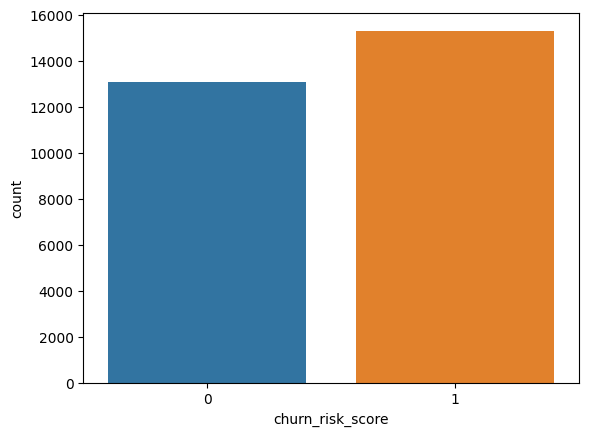

In [6]:
#Visualising the churn_risk_score

sns.countplot(x = 'churn_risk_score', data = df)
plt.show()



In [7]:
#Pre-processing using OneHotEncoder

ohencoder = OneHotEncoder(drop = 'first', dtype=np.int64)
dfn = df[['gender', 'region_category', 'membership_category', 'joined_through_referral', 
        'preferred_offer_types', 'medium_of_operation', 'internet_option', 
        'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status']] 
dfn = ohencoder.fit_transform(dfn).toarray() 
dfn = pd.DataFrame(dfn)



In [8]:
dfn.info()
dfn.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28373 entries, 0 to 28372
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       28373 non-null  int64
 1   1       28373 non-null  int64
 2   2       28373 non-null  int64
 3   3       28373 non-null  int64
 4   4       28373 non-null  int64
 5   5       28373 non-null  int64
 6   6       28373 non-null  int64
 7   7       28373 non-null  int64
 8   8       28373 non-null  int64
 9   9       28373 non-null  int64
 10  10      28373 non-null  int64
 11  11      28373 non-null  int64
 12  12      28373 non-null  int64
 13  13      28373 non-null  int64
 14  14      28373 non-null  int64
 15  15      28373 non-null  int64
 16  16      28373 non-null  int64
 17  17      28373 non-null  int64
 18  18      28373 non-null  int64
 19  19      28373 non-null  int64
 20  20      28373 non-null  int64
 21  21      28373 non-null  int64
 22  22      28373 non-null  int64
 23  23      283

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0,0,0,1,0,0,1,0,0,1,...,0,0,1,1,1,0,1,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,0,1,0
2,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,0,0,0,0,0,1,0,0,0,1,...,1,1,0,0,1,1,0,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1


In [9]:
#Concatenating both of the datasets

df = pd.concat([df, dfn], axis = 1)
df.drop(['age', 'gender', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral',
         'preferred_offer_types', 'medium_of_operation', 'internet_option', 'used_special_discount',
         'avg_frequency_login_days', 'offer_application_preference', 'past_complaint', 'complaint_status',
         'feedback'], axis = 1, inplace = True)

         

In [10]:
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28373 entries, 0 to 28372
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   days_since_last_login  28373 non-null  int64  
 1   avg_time_spent         28373 non-null  float64
 2   avg_transaction_value  28373 non-null  float64
 3   points_in_wallet       28373 non-null  float64
 4   churn_risk_score       28373 non-null  int64  
 5   0                      28373 non-null  int64  
 6   1                      28373 non-null  int64  
 7   2                      28373 non-null  int64  
 8   3                      28373 non-null  int64  
 9   4                      28373 non-null  int64  
 10  5                      28373 non-null  int64  
 11  6                      28373 non-null  int64  
 12  7                      28373 non-null  int64  
 13  8                      28373 non-null  int64  
 14  9                      28373 non-null  int64  
 15  10

,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score,0,1,2,3,4,...,15,16,17,18,19,20,21,22,23,24
0,17,300.63,53005.25,781.75,0,0,0,0,1,0,...,0,0,1,1,1,0,1,0,0,0
1,14,516.16,21027.00,500.69,1,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,0
2,11,53.27,25239.56,567.66,1,1,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
3,20,113.13,24483.66,663.06,1,0,0,0,0,0,...,1,1,0,0,1,1,0,1,0,0
4,23,433.62,13884.77,722.27,0,1,0,0,0,1,...,0,0,1,1,0,1,0,0,0,1


In [11]:
#Variables x and y are initialised

x = df.drop('churn_risk_score', axis = 1)
y = df['churn_risk_score']



In [12]:
#Training and testing variables initialised

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [13]:
#Feature Scaling - Standardisation

scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)



<AxesSubplot:>

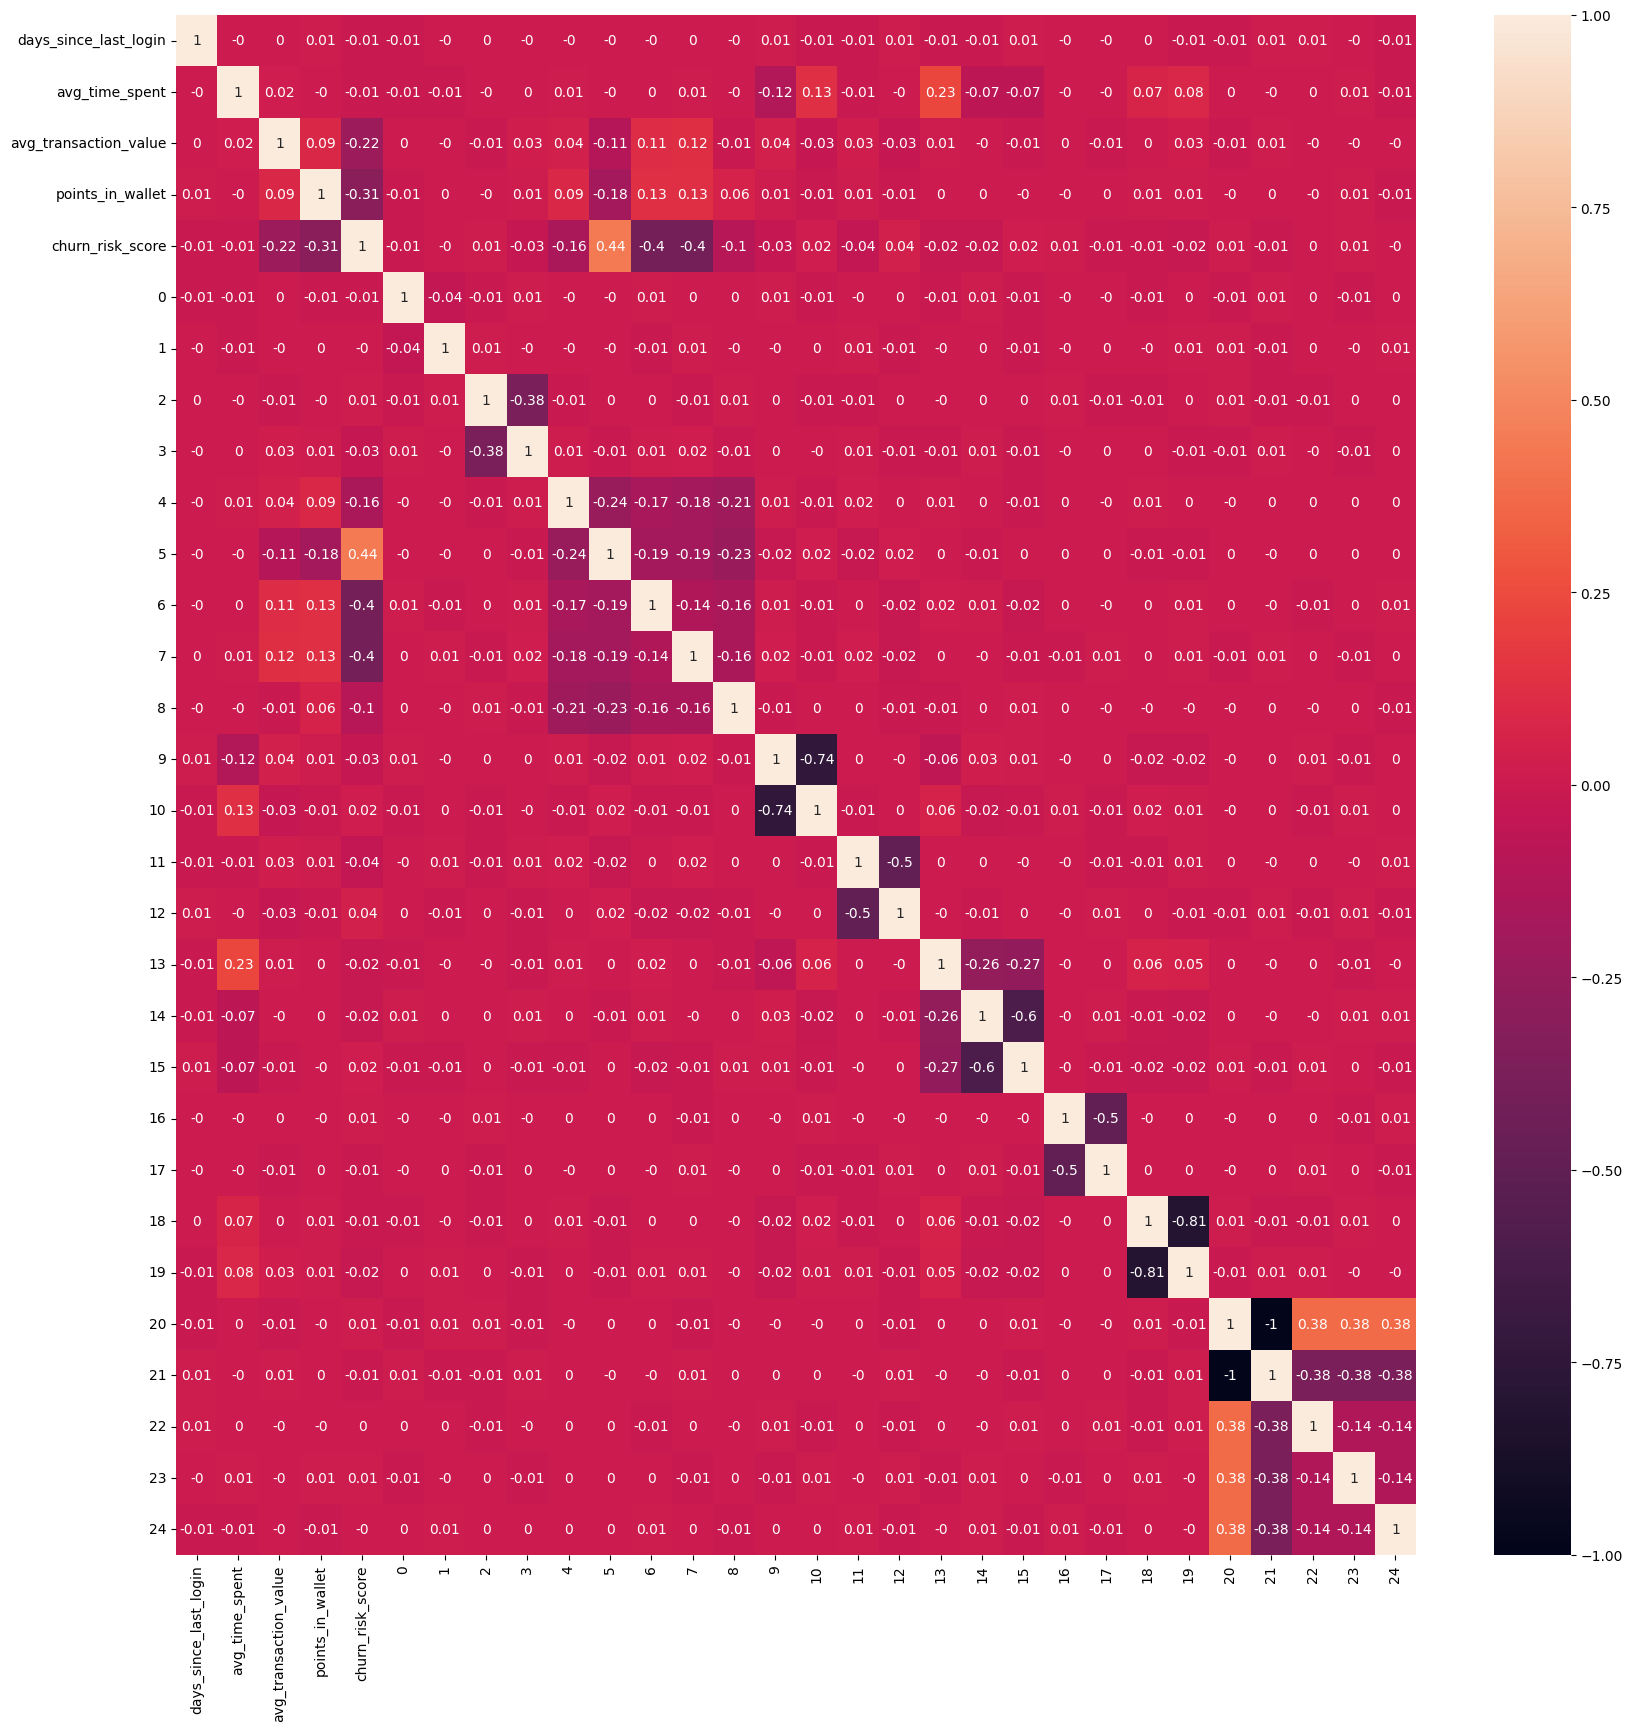

In [14]:
plt.figure(figsize = (20, 20))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)



(array([2.0000e+00, 1.3000e+01, 7.9000e+01, 8.4200e+02, 8.0490e+03,
        1.1382e+04, 1.8460e+03, 4.1800e+02, 5.8000e+01, 9.0000e+00]),
 array([-7.63378195, -6.17252054, -4.71125914, -3.24999774, -1.78873634,
        -0.32747494,  1.13378646,  2.59504786,  4.05630926,  5.51757066,
         6.97883206]),
 <BarContainer object of 10 artists>)

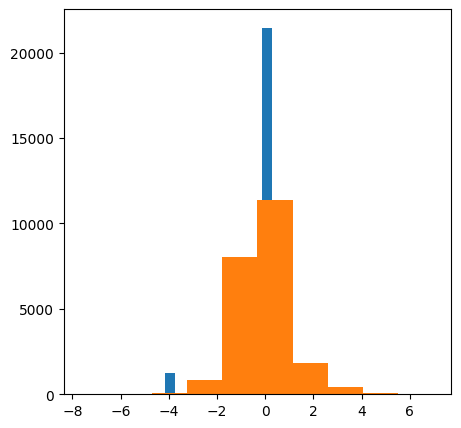

In [15]:
#Plotting a histogram

fig, ax = plt.subplots(figsize = (5, 5))

histogram = scale.fit_transform(x_train)

ax.hist(histogram[:,0])
ax.hist(histogram[:,1])



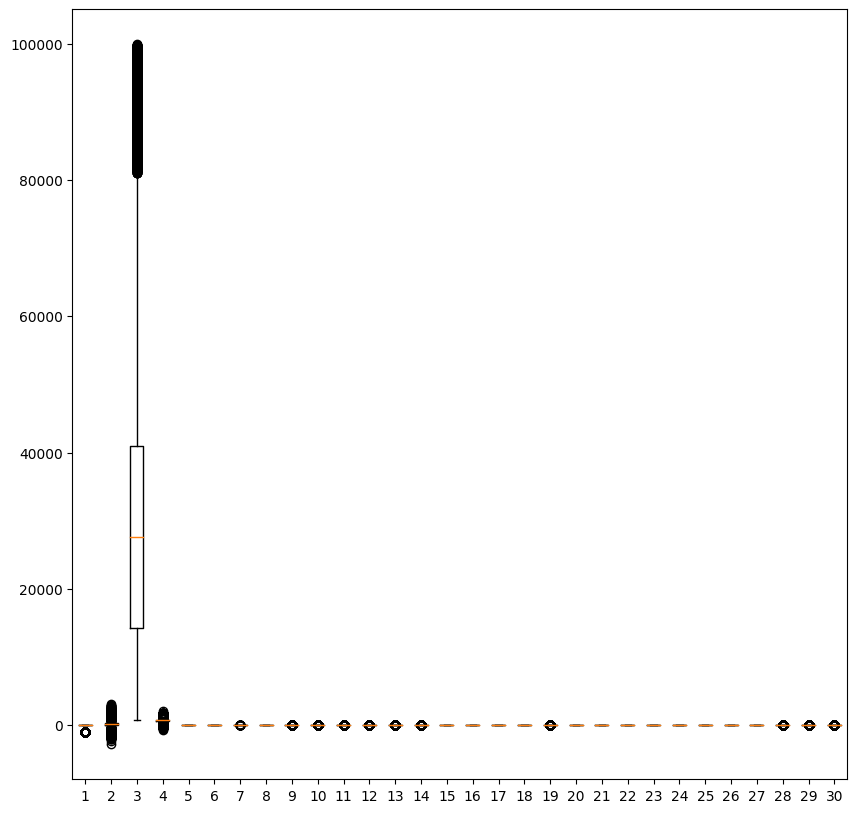

In [16]:
#Plotting a box plot

plt.figure(figsize=(10, 10))
plt.boxplot(df)
plt.show()



Logistic Regression

In [17]:
#Initialising Logistic Regression

logistic = LogisticRegression()
logistic_score = logistic.fit(x_train, y_train)
logistic_score.score(x_test, y_test)



0.8625550660792951

In [18]:
#Grid Search for Logistic Regression

grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}
logistic_grid=GridSearchCV(logistic, grid, cv=5)
logistic_grid.fit(x_train, y_train)

print("Tuned Hyperparameters (Best Parameters): ",logistic_grid.best_params_)
print("Accuracy :",logistic_grid.best_score_)

#Reference: https://www.kaggle.com/code/enespolat/grid-search-with-logistic-regression



Tuned Hyperparameters (Best Parameters):  {'C': 0.001, 'penalty': 'l2'}
Accuracy : 0.8694594376878604


In [19]:
#Random Search for Logistic Regression

random = dict(C=np.logspace(0, 4, num=10), penalty=['l2'])
logistic_random = RandomizedSearchCV(logistic, random)
logistic_random.fit(x_train, y_train)

print("Tuned Hyperparameters (Best Parameters): ",logistic_random.best_params_)
print("Accuracy :",logistic_random.best_score_)

#Reference: https://medium.com/@jackstalfort/hyperparameter-tuning-using-grid-search-and-random-search-f8750a464b35



Tuned Hyperparameters (Best Parameters):  {'penalty': 'l2', 'C': 7.742636826811269}
Accuracy : 0.8679617567959719


In [20]:
#Classification Report for Logistic Regression

y_pred = logistic.predict(x_test)

print(classification_report(y_test, y_pred, target_names = ["0", "1"]))
plt.show(classification_report(y_test, y_pred, target_names = ["0", "1"]))

#Reference: https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html



              precision    recall  f1-score   support

           0       0.81      0.91      0.86      2601
           1       0.92      0.82      0.87      3074

    accuracy                           0.86      5675
   macro avg       0.86      0.87      0.86      5675
weighted avg       0.87      0.86      0.86      5675



[[2378  223]
 [ 557 2517]]


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

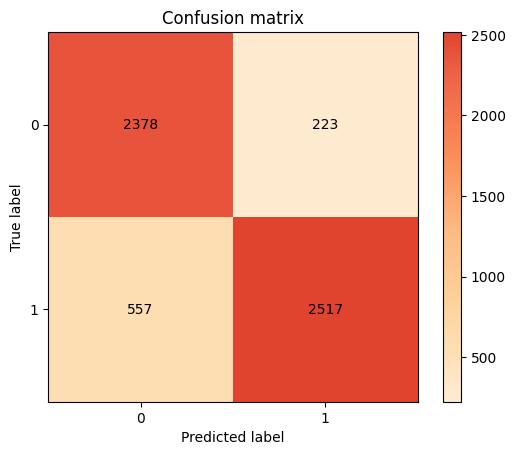

In [21]:
#Confusion Matrix for Logistic Regression

y_pred = logistic.predict(x_test)
print(confusion_matrix(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred, target_names=["0", "1"])



In [22]:
#Cross Validation for Logistic Regression

print(cross_val_score(logistic, x_train, y_train, cv=5))
cross_mean = np.mean(cross_val_score(logistic, x_train, y_train, cv=5))
print("Mean of Cross Validaton: {}".format(cross_mean))



[0.87 0.88 0.86 0.86 0.87]
Mean of Cross Validaton: 0.8679177136379475


In [23]:
#Training score for Logistic Regression

score = logistic.score(x_train, y_train) 
print('Training score: {:.3f}'.format(score))



Training score: 0.869


In [24]:
#Test score for Logistic Regression

score = logistic.score(x_test, y_test) 
print('Test score: {:.3f}'.format(score))



Test score: 0.863


KNN (K-Nearest Neighbour)

In [25]:
#Initialising KNN

knn_class = KNeighborsClassifier(n_neighbors=3)
knn_score = knn_class.fit(x_train, y_train)
knn_score.score(x_test, y_test)



0.8336563876651982

In [26]:
#Grid Search for KNN

k_range = list(range(1, 6))
param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn_class, param_grid, cv=5, scoring='accuracy', return_train_score=False,verbose=1)

grid_search=grid.fit(x_train, y_train)
print(grid.best_score_)

#Reference: https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
#Reference: https://www.datasklr.com/select-classification-methods/k-nearest-neighbors



Fitting 5 folds for each of 5 candidates, totalling 25 fits
0.8387960242751756


In [27]:
#Random Search for KNN

random = RandomizedSearchCV(estimator=knn_class, param_distributions=param_grid, cv=5, n_iter=5, random_state=0)

random.fit(x_train, y_train)
print(random.best_score_)



0.8387960242751756


In [28]:
#Classification Report for KNN

y_pred = knn_class.predict(x_test)

print(classification_report(y_test, y_pred, target_names = ["0", "1"]))
plt.show()



              precision    recall  f1-score   support

           0       0.83      0.81      0.82      2601
           1       0.84      0.86      0.85      3074

    accuracy                           0.83      5675
   macro avg       0.83      0.83      0.83      5675
weighted avg       0.83      0.83      0.83      5675



[[2102  499]
 [ 445 2629]]


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

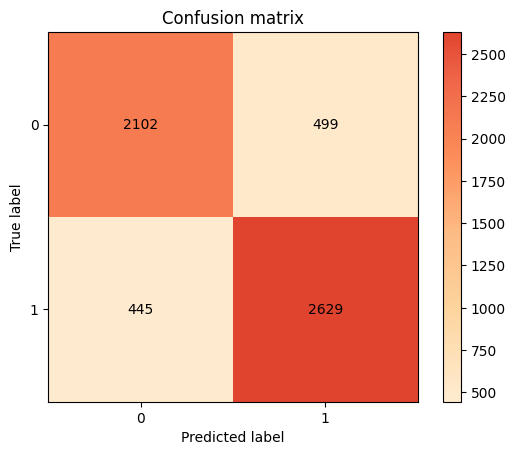

In [29]:
#Confusion Matrix for KNN

y_pred = knn_class.predict(x_test)
print(confusion_matrix(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred, target_names=["0", "1"])



In [30]:
#Cross Validation for KNN

print(cross_val_score(knn_class, x_train, y_train, cv=5))
cross_mean = np.mean(cross_val_score(knn_class, x_train, y_train, cv=5))
print("Mean of Cross Validaton: {}".format(cross_mean))



[0.84 0.83 0.83 0.83 0.83]
Mean of Cross Validaton: 0.8328044757476322


In [31]:
#Training Score for KNN

score = knn_class.score(x_train, y_train) 
print('Training score: {:.3f}'.format(score)) 



Training score: 0.914


In [32]:
#Test score for KNN

score = knn_class.score(x_test, y_test) 
print('Test score: {:.3f}'.format(score))



Test score: 0.834
